<a href="https://colab.research.google.com/github/aruntakhur/PyTorch_NLP_Vision_New/blob/main/py_torch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch.nn as nn
import torch

In [3]:
class Net_S(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net_S,self).__init__()
    self.linear1 = nn.Linear(D_in,H)
    self.linear2 = nn.Linear(H, D_out)

  def forward(self,x):
    x = torch.sigmoid(self.linear1(x))
    x = self.linear2(x)
    return x



In [4]:
class Net_T(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net_T,self).__init__()
    self.linear1 = nn.Linear(D_in,H)
    self.linear2 = nn.Linear(H, D_out)

  def forward(self,x):
    x = torch.tanh(self.linear1(x))
    x = self.linear2(x)
    return x



In [5]:
class Net_R(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net_R,self).__init__()
    self.linear1 = nn.Linear(D_in,H)
    self.linear2 = nn.Linear(H, D_out)

  def forward(self,x):
    x = torch.relu(self.linear1(x))
    x = self.linear2(x)
    return x



In [6]:
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch import optim

In [7]:
train_dataset = dsets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
validation_dataset = dsets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, shuffle=True, batch_size = 1000 , num_workers=2, pin_memory=True)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, shuffle=True, batch_size = 5000 , num_workers=2, pin_memory=True)

In [9]:
model_S = Net_S(28*28, 10, 10)
model_T = Net_T(28*28, 10, 10)
model_R = Net_R(28*28, 10, 10)
criterion = nn.CrossEntropyLoss()
optimizer_S = optim.Adam(model_S.parameters(), lr = 0.01)
optimizer_T = optim.Adam(model_T.parameters(), lr = 0.01)
optimizer_R = optim.Adam(model_R.parameters(), lr = 0.01)

In [10]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs):
  i = 0
  useful_stuff = {'training_loss':[],'validation_accuracy':[]}
  for epoch in epochs:
    for i, (x,y) in enumerate(train_loader):
      optimizer.zero_grad()
      z = model(x.view(-1,28*28))
      loss = criterion(z,y)
      loss.backward()
      optimizer.step()
      useful_stuff['training_loss'].append(loss.data.item())
    correct = 0 
    for x,y in validation_loader:
        z = model(x.view(-1,28*28))
        _, label = torch.max(z,1)
        correct += (y==label).sum().item()
    accuracy = 100*(correct/len(validation_dataset))
    useful_stuff['validation_accuracy'].append(accuracy)
    print(epoch,accuracy)
  return useful_stuff

     

In [11]:
useful_stuff_S = train(model_S, criterion, train_loader, validation_loader, optimizer_S, range(1) )
useful_stuff_T = train(model_T, criterion, train_loader, validation_loader, optimizer_T, range(1) )
useful_stuff_R = train(model_R, criterion, train_loader, validation_loader, optimizer_R, range(1) )

0 84.86
0 88.29
0 90.02


In [12]:
# Define a function to display data

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

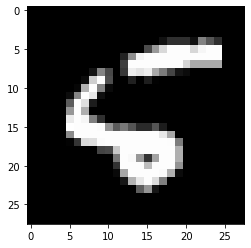

5


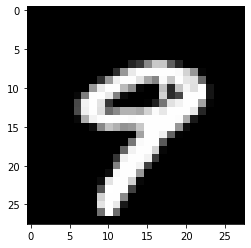

9


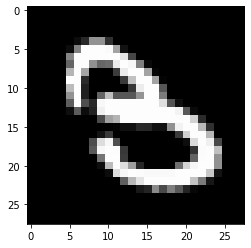

3


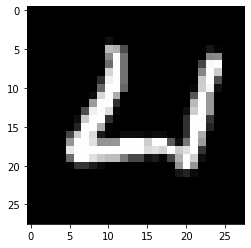

4


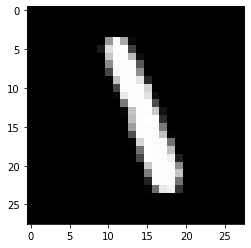

1


In [13]:
import matplotlib.pyplot as plt

count = 0
for x, y in validation_dataset:
    z = model_S(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        print(y)
        count += 1
    if count >= 5:
        break

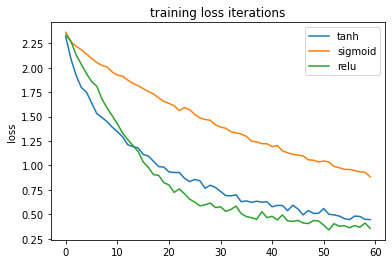

In [14]:
# Compare the training loss

plt.plot(useful_stuff_T['training_loss'], label='tanh')
plt.plot(useful_stuff_S['training_loss'], label='sigmoid')
plt.plot(useful_stuff_R['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

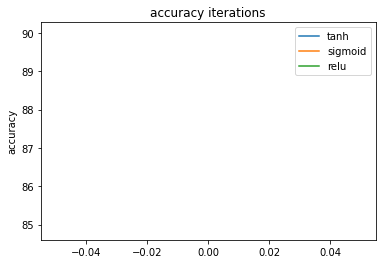

In [15]:
# Compare the training loss

plt.plot(useful_stuff_T['validation_accuracy'], label='tanh')
plt.plot(useful_stuff_S['validation_accuracy'], label='sigmoid')
plt.plot(useful_stuff_R['validation_accuracy'], label='relu')
plt.ylabel('accuracy')
plt.title('accuracy iterations')
plt.legend()
plt.show()

In [16]:
useful_stuff_S['validation_accuracy']

[84.86]

In [17]:
class Net_D(nn.Module):
  def __init__(self,in_D,H1,H2,out_D):
    super(Net_D,self).__init__()
    self.linear1 = nn.Linear(in_D,H1)
    self.linear2 = nn.Linear(H1,H2)
    self.linear3 = nn.Linear(H2,out_D)
  def forward(self,x):
    x = torch.relu(self.linear1(x))
    x = torch.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [18]:
model_D = Net_D(28*28,10,10,10)
optimizer_D = optim.Adam(model_D.parameters(), lr = 0.01)
useful_stuff_D = train(model_D, criterion, train_loader, validation_loader, optimizer_D, range(5) )

0 87.61
1 90.64999999999999
2 91.57
3 92.06
4 92.28


In [19]:
import torch.nn.functional as F
class Net_DD(nn.Module):
    
    # Constructor
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size, p=0):
        super(Net_DD, self).__init__()
        self.drop = nn.Dropout(p=p)
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)
    
    # Prediction function
    def forward(self, x):
        x = F.relu(self.drop(self.linear1(x)))
        x = F.relu(self.drop(self.linear2(x)))
        x = self.linear3(x)
        return x

In [20]:
model_DD = Net_DD(28*28,50,10,10,0.1)
optimizer_DD = optim.Adam(model_DD.parameters(), lr = 0.01)
useful_stuff_D = train(model_DD, criterion, train_loader, validation_loader, optimizer_DD, range(5) )

0 86.97
1 90.45
2 91.56
3 92.89
4 93.64


In [21]:
model_DD.train()

Net_DD(
  (drop): Dropout(p=0.1, inplace=False)
  (linear1): Linear(in_features=784, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=10, bias=True)
)

In [23]:
import torch.nn.functional as F
class Net_DD(nn.Module):
    
    # Constructor
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size, p=0):
        super(Net_DD, self).__init__()
        self.drop = nn.Dropout(p=p)
        self.linear1 = nn.Linear(in_size, n_hidden1)
        torch.nn.init.xavier_uniform_(self.linear1.weight)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        torch.nn.init.kaiming_uniform_(self.linear2.weight,nonlinearity='relu') #He initialization method
        self.linear3 = nn.Linear(n_hidden2, out_size)
    
    # Prediction function
    def forward(self, x):
        x = F.relu(self.drop(self.linear1(x)))
        x = F.relu(self.drop(self.linear2(x)))
        x = self.linear3(x)
        return x

In [24]:
model_DD = Net_DD(28*28,50,10,10,0.1)
optimizer_DD = optim.Adam(model_DD.parameters(), lr = 0.01)
useful_stuff_D = train(model_DD, criterion, train_loader, validation_loader, optimizer_DD, range(5) )

0 79.45
1 86.53
2 88.79
3 90.97
4 91.41


In [37]:
# Define the neural network with Xavier initialization

class Net_Xavier(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_Xavier, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.xavier_uniform_(linear.weight)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [38]:
# Define the neural network with Uniform initialization

class Net_Uniform(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [40]:
# Define the class for neural network model with He Initialization

class Net_He(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_He, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity='relu')
            self.hidden.append(linear)
        print(self.hidden)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [41]:
l = [5,6,7,8,9,10]
Net_He(l)

ModuleList(
  (0): Linear(in_features=5, out_features=6, bias=True)
  (1): Linear(in_features=6, out_features=7, bias=True)
  (2): Linear(in_features=7, out_features=8, bias=True)
  (3): Linear(in_features=8, out_features=9, bias=True)
  (4): Linear(in_features=9, out_features=10, bias=True)
)


Net_He(
  (hidden): ModuleList(
    (0): Linear(in_features=5, out_features=6, bias=True)
    (1): Linear(in_features=6, out_features=7, bias=True)
    (2): Linear(in_features=7, out_features=8, bias=True)
    (3): Linear(in_features=8, out_features=9, bias=True)
    (4): Linear(in_features=9, out_features=10, bias=True)
  )
)

In [42]:
class NetBatchNorm(nn.Module):
  def __init__(self, in_D,H1,H2,out_D):
    super(NetBatchNorm, self).__init__()
    self.linear = nn.Linear(in_D,H1)
    self.linear2 = nn.Linear(H1,H2)
    self.linear3 = nn.Linear(H2,out_D)

    self.bn1 = nn.BatchNorm1d(H1)
    self.bn2 = nn.BatchNorm1d(H2)
  
  def forward(self, x):
    x = torch.relu(self.bn1(self.linear1(x)))
    x = torch.relu(self.bn2(self.linear2(x)))
    x = self.linear3(x)
    return x


BatchNormalization

In [45]:
# Define the Neural Network Model using Batch Normalization

class NetBatchNorm(nn.Module):
    
    # Constructor
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size):
        super(NetBatchNorm, self).__init__()
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)
        self.bn1 = nn.BatchNorm1d(n_hidden1)
        self.bn2 = nn.BatchNorm1d(n_hidden2)
        
    # Prediction
    def forward(self, x):
        x = self.bn1(torch.sigmoid(self.linear1(x)))
        x = self.bn2(torch.sigmoid(self.linear2(x)))
        x = self.linear3(x)
        return x
    
    # Activations, to analyze results 
    def activation(self, x):
        out = []
        z1 = self.bn1(self.linear1(x))
        out.append(z1.detach().numpy().reshape(-1))
        a1 = torch.sigmoid(z1)
        out.append(a1.detach().numpy().reshape(-1).reshape(-1))
        z2 = self.bn2(self.linear2(a1))
        out.append(z2.detach().numpy().reshape(-1))
        a2 = torch.sigmoid(z2)
        out.append(a2.detach().numpy().reshape(-1))
        return out

In [46]:
# Define the function to train model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            model.train()
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
            
        correct = 0
        for x, y in validation_loader:
            model.eval()
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
            
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

In [47]:
# Set the parameters

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

In [48]:
# Create model, optimizer and train the model

model_norm  = NetBatchNorm(input_dim, hidden_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model_norm.parameters(), lr = 0.1)
training_results_Norm=train(model_norm , criterion, train_loader, validation_loader, optimizer, epochs=5)

In [50]:
# Class Net for Neural Network Model

class Net(nn.Module):
    
    # Constructor
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size):

        super(Net, self).__init__()
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)
    
    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x
    
    # Activations, to analyze results 
    def activation(self, x):
        out = []
        z1 = self.linear1(x)
        out.append(z1.detach().numpy().reshape(-1))
        a1 = torch.sigmoid(z1)
        out.append(a1.detach().numpy().reshape(-1).reshape(-1))
        z2 = self.linear2(a1)
        out.append(z2.detach().numpy().reshape(-1))
        a2 = torch.sigmoid(z2)
        out.append(a2.detach().numpy().reshape(-1))
        return out 


In [51]:
# Create model without Batch Normalization, optimizer and train the model

model = Net(input_dim, hidden_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=5)

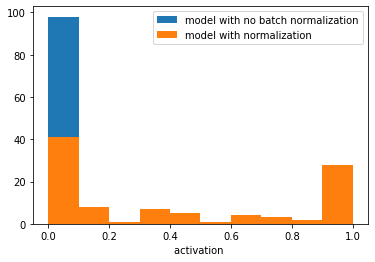

In [71]:
model.eval()
model_norm.eval()
out=model.activation(validation_dataset[0][0].reshape(-1,28*28))
plt.hist(out[3],label='model with no batch normalization' )
out_norm=model_norm.activation(validation_dataset[0][0].reshape(-1,28*28))
plt.hist(out_norm[3],label='model with normalization')
plt.xlabel("activation ")
plt.legend()
plt.show()

In [63]:
out[1]

array([3.71320814e-17, 9.99921203e-01, 1.25526097e-17, 5.28571171e-25,
       1.00000000e+00, 2.26669034e-16, 1.67017865e-25, 1.00000000e+00,
       1.06831401e-23, 2.82998517e-23, 1.29747226e-15, 1.00000000e+00,
       1.96383678e-15, 5.88259848e-24, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 3.85050383e-18, 1.00000000e+00, 3.67533322e-14,
       9.99819219e-01, 1.00000000e+00, 3.95645096e-22, 5.53085337e-23,
       5.51264759e-18, 1.03749855e-21, 1.10111623e-16, 1.00000000e+00,
       1.00000000e+00, 1.76341969e-19, 8.80503066e-23, 1.48439742e-21,
       7.84730737e-20, 1.00000000e+00, 1.00000000e+00, 8.38245319e-15,
       5.32048085e-27, 9.59625174e-13, 1.82850290e-13, 9.99999046e-01,
       4.27081476e-16, 3.16723993e-19, 1.09654138e-19, 1.97183379e-20,
       1.08896252e-20, 1.07893125e-20, 2.86065345e-19, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 3.16017405e-15, 3.90546047e-18,
       3.20601372e-21, 2.13340509e-18, 1.59627452e-26, 5.28451540e-20,
      

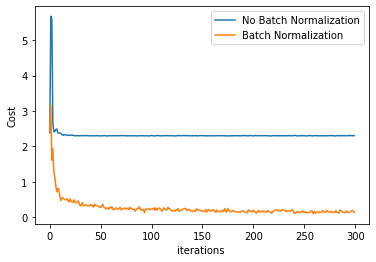

In [55]:
# Plot the diagram to show the loss

plt.plot(training_results['training_loss'], label='No Batch Normalization')
plt.plot(training_results_Norm['training_loss'], label='Batch Normalization')
plt.ylabel('Cost')
plt.xlabel('iterations ')   
plt.legend()
plt.show()

CNN with PyTorch: Week 6